In [1]:
#importing packages
import pandas as pd
import numpy as np

In [2]:
Dtrain = pd.read_csv("../TrainingSet (IR - 21).csv")
Dtest = pd.read_csv("../TestingSet (IR - 21).csv")

In [3]:
print(Dtrain.shape)
print(Dtest.shape)

(193792, 4)
(48448, 4)


In [4]:
Dtrain["Bearing"].value_counts()

Inner Race (0.021")    96896
Normal                 96896
Name: Bearing, dtype: int64

In [5]:
Dtrain["Bearing"].value_counts(normalize=True)*100

Inner Race (0.021")    50.0
Normal                 50.0
Name: Bearing, dtype: float64

In [6]:
Dtest.columns

Index(['Bearing', 'Fault Diameter', 'DE', 'FE'], dtype='object')

In [7]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
labelencoder_train = LabelEncoder()
Dtrain["Bearing"] = labelencoder_train.fit_transform(Dtrain["Bearing"])
ct = ColumnTransformer([("Bearing", OneHotEncoder(), [0])],    remainder = 'passthrough')
Dtrain = ct.fit_transform(Dtrain)

In [8]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
labelencoder_train = LabelEncoder()
Dtest["Bearing"] = labelencoder_train.fit_transform(Dtest["Bearing"])
ct = ColumnTransformer([("Bearing", OneHotEncoder(), [0])],    remainder = 'passthrough')
Dtest = ct.fit_transform(Dtest)

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(Dtrain))
# Random shuffle training data
X_train.sample(frac=1)

X_test = pd.DataFrame(scaler.transform(Dtest))

In [10]:
X_train = X_train.values.reshape(-1, 1, 5)

X_test  = X_test.values.reshape(-1, 1, 5)

In [11]:
from keras.layers import Input, Dropout, Dense, LSTM, RepeatVector, TimeDistributed
from keras.models import Model, Sequential, load_model
from keras import regularizers

Using TensorFlow backend.


In [12]:
# Input layer:
model=Sequential([
    LSTM(32, activation='relu', input_shape=(X_train.shape[1],X_train.shape[2])),
    Dropout(0.2),
    RepeatVector(X_train.shape[1]),
    LSTM(32, activation='relu', return_sequences=True),
    Dropout(0.2),
    TimeDistributed(Dense(X_train.shape[2]))
])

model.compile(loss='mse',optimizer='adam' )
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 32)                4864      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 1, 32)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 32)             8320      
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 32)             0         
_________________________________________________________________
time_distributed_1 (TimeDist (None, 1, 5)              165       
Total params: 13,349
Trainable params: 13,349
Non-trainable params: 0
__________________________________________________

In [13]:
# Train model for 100 epochs, batch size of 100: 
NUM_EPOCHS=100
BATCH_SIZE=1000

history=model.fit(X_train,X_train, 
                  batch_size=BATCH_SIZE, 
                  epochs=NUM_EPOCHS,
                  validation_data=(X_test, X_test),
                  shuffle=False)

Train on 193792 samples, validate on 48448 samples
Epoch 1/100
193792/193792 [==============================] - 7s 36us/step - loss: 0.1879 - val_loss: 0.1659
Epoch 2/100
193792/193792 [==============================] - 3s 15us/step - loss: 0.0753 - val_loss: 0.0256
Epoch 3/100
193792/193792 [==============================] - 3s 17us/step - loss: 0.0273 - val_loss: 0.0052
Epoch 4/100
193792/193792 [==============================] - 5s 24us/step - loss: 0.0186 - val_loss: 0.0049
Epoch 5/100
193792/193792 [==============================] - 4s 21us/step - loss: 0.0157 - val_loss: 0.0046
Epoch 6/100
193792/193792 [==============================] - 5s 25us/step - loss: 0.0132 - val_loss: 0.0029
Epoch 7/100
193792/193792 [==============================] - 5s 24us/step - loss: 0.0111 - val_loss: 0.0022
Epoch 8/100
193792/193792 [==============================] - 4s 23us/step - loss: 0.0098 - val_loss: 0.0019
Epoch 9/100
193792/193792 [==============================] - 5s 25us/step - loss: 0.0

Epoch 76/100
193792/193792 [==============================] - 4s 21us/step - loss: 0.0034 - val_loss: 0.0015
Epoch 77/100
193792/193792 [==============================] - 5s 24us/step - loss: 0.0034 - val_loss: 0.0013
Epoch 78/100
193792/193792 [==============================] - 4s 23us/step - loss: 0.0034 - val_loss: 0.0015
Epoch 79/100
193792/193792 [==============================] - 4s 21us/step - loss: 0.0034 - val_loss: 0.0015
Epoch 80/100
193792/193792 [==============================] - 4s 22us/step - loss: 0.0034 - val_loss: 0.0013
Epoch 81/100
193792/193792 [==============================] - 4s 23us/step - loss: 0.0034 - val_loss: 0.0014
Epoch 82/100
193792/193792 [==============================] - 4s 23us/step - loss: 0.0034 - val_loss: 0.0015
Epoch 83/100
193792/193792 [==============================] - 5s 24us/step - loss: 0.0034 - val_loss: 0.0013
Epoch 84/100
193792/193792 [==============================] - 4s 22us/step - loss: 0.0034 - val_loss: 0.0014
Epoch 85/100
193792

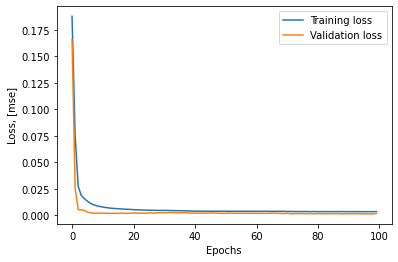

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss, [mse]')
plt.show()

In [15]:
X_pred = model.predict(X_train)

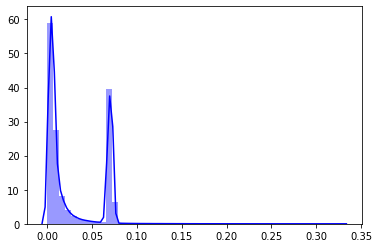

In [16]:
import seaborn as sns

scored = np.mean(np.abs(X_pred-X_train), axis = 1)
plt.figure()
g = sns.distplot(scored, bins = 50, kde= True, color = 'blue');
#g.set(xlim=(0.10,0.1), ylim=(0, 1))
plt.show()

In [17]:
model.evaluate(X_test,X_test)

48448/48448 [==============================] - 2s 38us/step


0.0017157947420740297

In [18]:
X_test_pred = model.predict(X_test)

In [19]:
X_test_pred = X_test_pred.reshape(X_test_pred.shape[0],X_test_pred.shape[2])
X_test = X_test.reshape(X_test.shape[0],X_test.shape[2])

In [20]:
TH = 0.07
scored = pd.DataFrame()
scored['Loss_mae'] = np.mean(np.abs(X_test_pred-X_test), axis = 1)
scored['Threshold'] = TH
scored['Anomaly'] = scored['Loss_mae'] > scored['Threshold']
scored.sample(100)

,Loss_mae,Threshold,Anomaly
14967,0.045045,0.07,False
45832,0.010109,0.07,False
43330,0.003683,0.07,False
14455,0.045644,0.07,False
48219,0.003503,0.07,False
...,...,...,...
7505,0.051102,0.07,False
43604,0.006598,0.07,False
45992,0.004265,0.07,False
28321,0.006365,0.07,False


In [21]:
X_pred_train = model.predict(np.array(X_train))

In [22]:
X_pred_train = X_pred_train.reshape(X_pred_train.shape[0],X_pred_train.shape[2])
X_train = X_train.reshape(X_train.shape[0],X_train.shape[2])

In [23]:
X_pred_train = pd.DataFrame(X_pred_train)
scored_train = pd.DataFrame()
scored_train['Loss_mae'] = np.mean(np.abs(X_pred_train-X_train), axis = 1)
scored_train['Threshold'] = TH
scored_train['Anomaly'] = scored_train['Loss_mae'] > scored_train['Threshold']
scored = pd.concat([scored_train, scored])

In [24]:
scored_train['Loss_mae'].mean()

0.02815823669903157

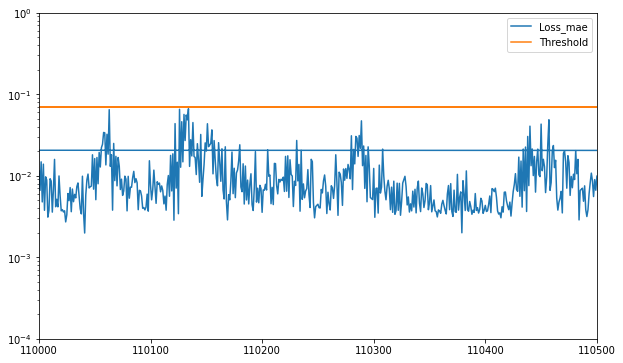

In [25]:
scored.plot(logy=True,  figsize = (10,6), xlim = [110000,110500], ylim = [1e-4,1e-0])

In [26]:
scored_train

,Loss_mae,Threshold,Anomaly
0,0.044451,0.07,False
1,0.047644,0.07,False
2,0.048539,0.07,False
3,0.050406,0.07,False
4,0.046552,0.07,False
...,...,...,...
193787,0.002602,0.07,False
193788,0.005431,0.07,False
193789,0.006126,0.07,False
193790,0.007139,0.07,False


In [27]:
anomalies = scored_train[scored_train['Anomaly'] == True]
print(anomalies)
print(anomalies.shape)

        Loss_mae  Threshold  Anomaly
96978   0.076121       0.07     True
97358   0.075835       0.07     True
97360   0.071372       0.07     True
99413   0.073559       0.07     True
99417   0.081095       0.07     True
...          ...        ...      ...
189067  0.097972       0.07     True
190664  0.078040       0.07     True
191501  0.096809       0.07     True
191503  0.071039       0.07     True
193174  0.081767       0.07     True

[113 rows x 3 columns]
(113, 3)


In [28]:
NB_anomalies = anomalies[anomalies.index <= 96896]
print(NB_anomalies)
print(NB_anomalies.shape)

Empty DataFrame
Columns: [Loss_mae, Threshold, Anomaly]
Index: []
(0, 3)


In [29]:
IR21_anomalies = anomalies[anomalies.index > 96896]
print(IR21_anomalies)
print(IR21_anomalies.shape)

        Loss_mae  Threshold  Anomaly
96978   0.076121       0.07     True
97358   0.075835       0.07     True
97360   0.071372       0.07     True
99413   0.073559       0.07     True
99417   0.081095       0.07     True
...          ...        ...      ...
189067  0.097972       0.07     True
190664  0.078040       0.07     True
191501  0.096809       0.07     True
191503  0.071039       0.07     True
193174  0.081767       0.07     True

[113 rows x 3 columns]
(113, 3)


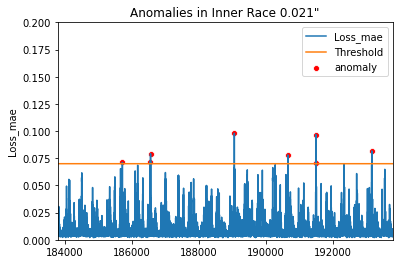

In [30]:
plt.plot(scored_train.index, scored_train.Loss_mae, label='Loss_mae')
plt.plot(scored_train.index, scored_train.Threshold, label='Threshold')
g = sns.scatterplot(x=anomalies.index , y=anomalies.Loss_mae, label='anomaly', color='red')
g.set(xlim = (len(scored_train.index)-10000, len(scored_train.index)), ylim = (0, 0.2))
plt.title('Anomalies in Inner Race 0.021"')
plt.legend();